In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import xarray as xr
import gsw # https://teos-10.github.io/GSW-Python/gsw_flat.html

# Import and organize data

In [121]:
# ADCP data
adcp1 = xr.open_dataset('ADCP/adcp1.nc')
adcp2 = xr.open_dataset('ADCP/adcp2.nc')

# ADV data
adv1dat = xr.open_dataset('ADV/adv1_dat.nc')
adv1sen = xr.open_dataset('ADV/adv1_sen.nc')
adv2dat = xr.open_dataset('ADV/adv2_dat.nc')
adv2sen = xr.open_dataset('ADV/adv2_sen.nc')

# Temperature data
temp = xr.open_dataset('Temperature/temp_qc.nc')

# SeaPHOX data
spx = xr.open_dataset('SeaPHOX/seaphox.nc')

# M1 data
m1_ns = xr.open_dataset('M1/m1_ns.nc')
m1_ew = xr.open_dataset('M1/m1_ew.nc')
m1_temp = xr.open_dataset('M1/m1_temp.nc')
m1_wind = xr.open_dataset('M1/m1_wind.nc')

# NBDC 46042 data
nbdc_july = xr.open_dataset('46042_Buoy/nbdc_july.nc')
nbdc_aug = xr.open_dataset('46042_Buoy/nbdc_aug.nc')
nbdc_sept = xr.open_dataset('46042_Buoy/nbdc_sept.nc')

In [3]:
# Filter unwanted data
# For adcp
adcp1 = adcp1.where((adcp1.Flag < 10) & (adcp1.Depth > 8))
adcp2 = adcp2.where((adcp2.Flag < 10) & (adcp2.Depth > 8))

# For adv
adv1 = adv1dat.where(adv1dat.Dat_flag < 42)
adv2 = adv2dat.where(adv2dat.Dat_flag < 42)

# For seaphox
spxqc = spx.where(spx.QC < 2)

In [127]:
new_flag = xr.zeros_like(adcp1.Flag)
new_flag = new_flag + xr.where(adcp1.Flag >= 42, 4, 0)
new_flag = new_flag + xr.where((adcp1.Flag < 42) & ((adcp1.Flag >= 42), 3, 0)

<xarray.DataArray 'Flag' (BinDist: 47, time: 34834)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time     (time) datetime64[ns] 2022-07-21T10:30:00 ... 2022-08-14T15:03:00
Dimensions without coordinates: BinDist

In [124]:
adcp1

<xarray.Dataset>
Dimensions:         (BinDist: 47, bin: 47, time: 34834)
Coordinates:
    BinDist         (bin) float64 ...
  * time            (time) datetime64[ns] 2022-07-21T10:30:00 ... 2022-08-14T...
Dimensions without coordinates: bin
Data variables:
    Pitch           (time) float64 ...
    Roll            (time) float64 ...
    Heading         (time) float64 ...
    Temperature     (time) float64 ...
    Depth           (time) float64 ...
    Battery         (time) int64 ...
    East            (BinDist, time) float64 ...
    North           (BinDist, time) float64 ...
    Vertical        (BinDist, time) float64 ...
    Magnitude       (BinDist, time) float64 ...
    Direction       (BinDist, time) float64 ...
    Error_velocity  (BinDist, time) float64 ...
    Correlation     (BinDist, time) int64 ...
    PG1             (BinDist, time) int64 ...
    PG4             (BinDist, time) int64 ...
    EA1             (BinDist, time) int64 ...
    EA2             (BinDist, time) int64 ...
    EA3             (BinDist, time) int64 ...
    EA4             (BinDist, time) int64 ...
    Flag            (BinDist, time) float64 38.0 38.0 38.0 ... 39.0 39.0 39.0
Attributes:
    description:          Velocity in beam coordinates
    PingsPerEns:          70
    TimePerPing:          00:00.85
    First Ensemble Date:  22/07/21
    First Ensemble Time:  10:30:00.00
    Ensemble Interval:    60.0
    1st Bin Range:        0.81
    Bin Size:             0.25
    RDI binary file:      C:\Users\tconnolly\Desktop\LG_SWC_Depl\ADCP\SWC0100...
    Instrument:           Broadband 1228.8 kHz

In [119]:
plt.figure(figsize = (10,5))
norm = matplotlib.colors.Normalize()

plt.pcolormesh(adcp1.time, adcp1.BinDist, adcp1.Flag,norm=norm)
plt.colorbar(label='Flag')

AttributeError: 'DataArray' object has no attribute 'Flag'

<Figure size 720x360 with 0 Axes>

In [96]:
# Average out data to 1, 5, and 10 minutes intervals

# ADCP data (first deployment)
#adcp1_5m = adcp1.resample(time='5Min').mean()
#adcp1_10m = adcp1.resample(time='10Min').mean()
#adcp1_10mroll = adcp1.isel(BinDist=1).rolling(time=10).mean() # Conduct a 10 minute rolling time to see how it compares
#adcp1_10mroll = adcp1.rolling(time=10).mean()

# ADCP data (second deployment)
#adcp2_1m = adcp2.resample(time='1Min').mean()
#adcp2_5m = adcp2.resample(time='5Min').mean()
#adcp2_10m = adcp2.resample(time='10Min').mean()
#adcp2_10mroll = adcp2.isel(BinDist=1).rolling(time=10).mean() # Conduct a 10 minute rolling time to see how it compares

#=========================================================================================================================

# ADV (first deployment)
#adv1_1s = adv1.resample(time='1S').mean()
#adv1_1m = adv1.resample(time='1Min').mean()
#adv1_5m = adv1.resample(time='5Min').mean()
#adv1_10m = adv1.resample(time='10Min').mean()
#adv1_1mroll = adv1.rolling(time=1).mean()
#adv1_10mroll = adv1.rolling(time=10).mean()

# ADV (second deployment)
#adv2_1s = adv2.resample(time='1S').mean()
#adv2_1m = adv2.resample(time='1Min').mean()
#adv2_5m = adv2.resample(time='5Min').mean()
#adv2_10m = adv2.resample(time='10Min').mean()
#adv2_1mroll = adv2.rolling(time=1).mean()
#adv2_10mroll = adv2.rolling(time=10).mean()

#=========================================================================================================================
#temp_5m = temp.resample(time='5min').mean()
#temp_10m = temp.resample(time='10min').mean()
#temp_10mroll = temp.rolling(time=10).mean()

# ANALYSIS
- Look at general overiew of time series
- Identify points of interest
    - Cooling and onshore transport events
    - Upwelling periods
- Look at velocity profiles and data from cooling events
    - Identify "good" ensembles of data over the duration of these events
    - Look at profiles from ADCP and make note of flow patterns during these events
        - Modal analysis?
- Spectral analysis of "good" data ensembles
    - Try to use esembles that occur during cooling events
- Temperature and stratification data
    - Use seaphox data to determine the relationship of temperature and salinity on density in the water column
        - Thermal expansion and haline coefficients
    - Use these rates to generate density profiles for the deployments
    - Calculate Richardson number gradient profiles
- Calculating dissipation rate from spectral data

### Complete overview of velocity and temperature time series

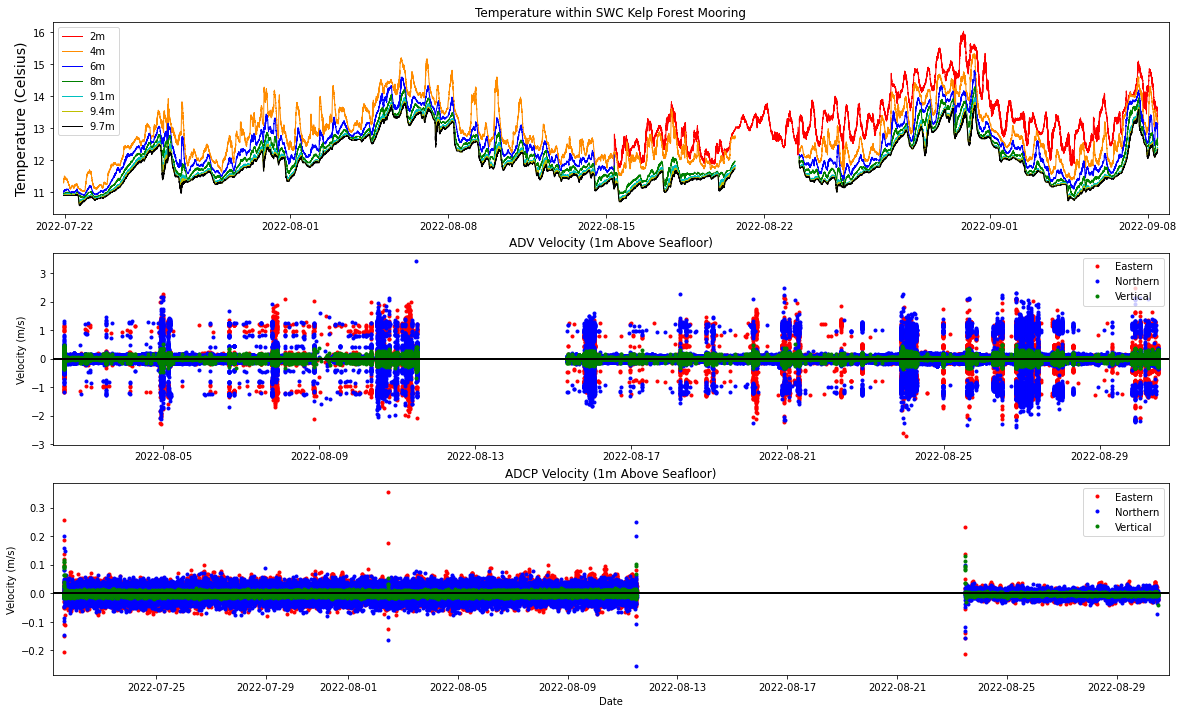

In [12]:
# TEMPERATURE
plt.figure(figsize = (20,12))

plt.subplot(311)
plt.plot(temp.time, temp.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp.time, temp.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp.time, temp.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp.time, temp.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp.time, temp.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp.time, temp.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp.time, temp.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)
#plt.xlabel("Datetime", fontsize = 14)
plt.margins(x=.01)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')
#=================================================================================================
# ADV
plt.subplot(312)
plt.plot(adv1.time, adv1.East, '.r', label = 'Eastern')
plt.plot(adv2.time, adv2.East, '.r')

plt.plot(adv1.time, adv1.North, '.b', label = 'Northern')
plt.plot(adv2.time, adv2.North, '.b')

plt.plot(adv1.time, adv1.Vertical, '.g', label = 'Vertical')
plt.plot(adv2.time, adv2.Vertical, '.g')

plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
#plt.xlabel('Date')
plt.title('ADV Velocity (1m Above Seafloor)')
plt.legend(loc = 'upper right')
#=================================================================================================
# ADCP
plt.subplot(313)
plt.plot(adcp1.time, adcp1.East.isel(BinDist=1), '.r', label = 'Eastern')
plt.plot(adcp2_1m.time, adcp2_1m.East.isel(BinDist=1), '.r')

plt.plot(adcp1.time, adcp1.North.isel(BinDist=1), '.b', label = 'Northern')
plt.plot(adcp2_1m.time, adcp2_1m.North.isel(BinDist=1), '.b')

plt.plot(adcp1.time, adcp1.Vertical.isel(BinDist=1), '.g', label = 'Vertical')
plt.plot(adcp2_1m.time, adcp2_1m.Vertical.isel(BinDist=1), '.g')

plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.xlabel('Date')
plt.title('ADCP Velocity (1m Above Seafloor)')
plt.legend(loc = 'upper right')

### Dataset can be divided into two deployments (d1 and d2)

In [59]:
# Deployment 1

# Slice datasets by most limiting timeframe
# Temperature
temp_dep1 = temp.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))

# ADCP
adcp_dep1 = adcp1.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adcp1_10mroll_dep1 = adcp1_10mroll.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000')) # 10 min rolling window for better looking data

# ADV
adv_dep1 = adv1.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adv_1s_dep1 = adv1_1s.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adv_1m_dep1 = adv1_1m.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))# Using 1min average since raw data is too chaotic
adv_5m_dep1 = adv1_5m.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adv_10m_dep1 = adv1_10m.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adv_1mroll_dep1 = adv1_1mroll.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))
adv_10mroll_dep1 = adv1_10mroll.sel(time=slice('2022-08-02T09:40:00.000000000', '2022-08-11T17:59:00.000000000'))


### Plot velocity components in relation to temperature time series for D1

Text(0.5, 1.0, 'Northern Velocity (1m Above Seafloor)')

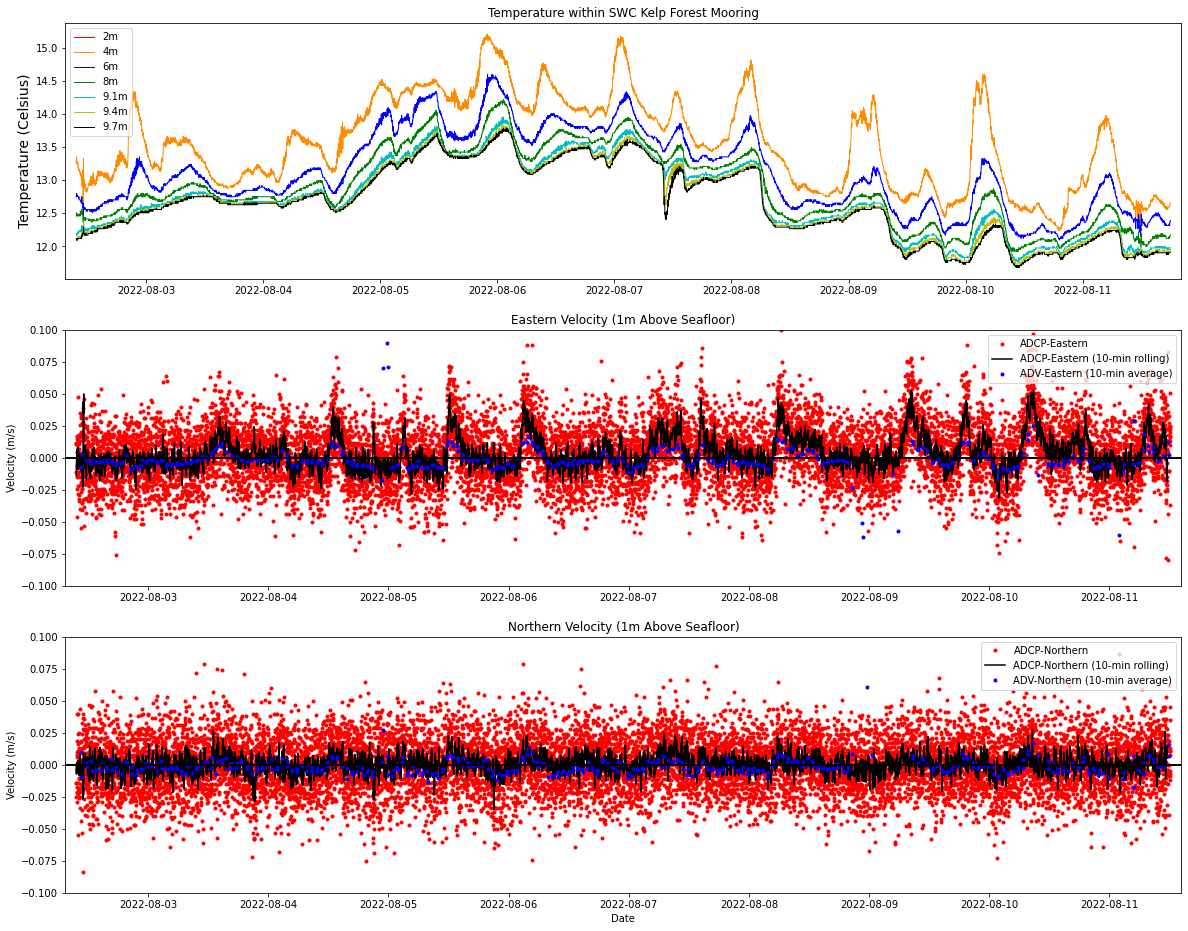

In [66]:
# TEMPERATURE
plt.figure(figsize = (20,16))

plt.subplot(311)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)
plt.margins(x=.01)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')
#=================================================================================================
# Eastern Velocity
plt.subplot(312)
plt.plot(adcp_dep1.time, adcp_dep1.East.isel(BinDist=1), '.r', label = 'ADCP-Eastern')
plt.plot(adcp1_10mroll_dep1.time, adcp1_10mroll_dep1.East,'-k', label = 'ADCP-Eastern (10-min rolling)')
plt.plot(adv_10m_dep1.time, adv_10m_dep1.East, '.b', label = 'ADV-Eastern (10-min average)')
plt.ylim(-.1,.1)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.title('Eastern Velocity (1m Above Seafloor)')
#=================================================================================================
# Northern Velocity
plt.subplot(313)
plt.plot(adcp_dep1.time, adcp_dep1.North.isel(BinDist=1), '.r', label = 'ADCP-Northern')
plt.plot(adcp1_10mroll_dep1.time, adcp1_10mroll_dep1.North,'-k', label = 'ADCP-Northern (10-min rolling)')
plt.plot(adv_10m_dep1.time, adv_10m_dep1.North, '.b', label = 'ADV-Northern (10-min average)')
plt.ylim(-.1,.1)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.xlabel('Date')
plt.title('Northern Velocity (1m Above Seafloor)')

### Plot velocity magnitude and direction to confirm Northeastern current correlation to cooling 

Text(0.5, 1.0, 'Velocity direction (1m Above Seafloor)')

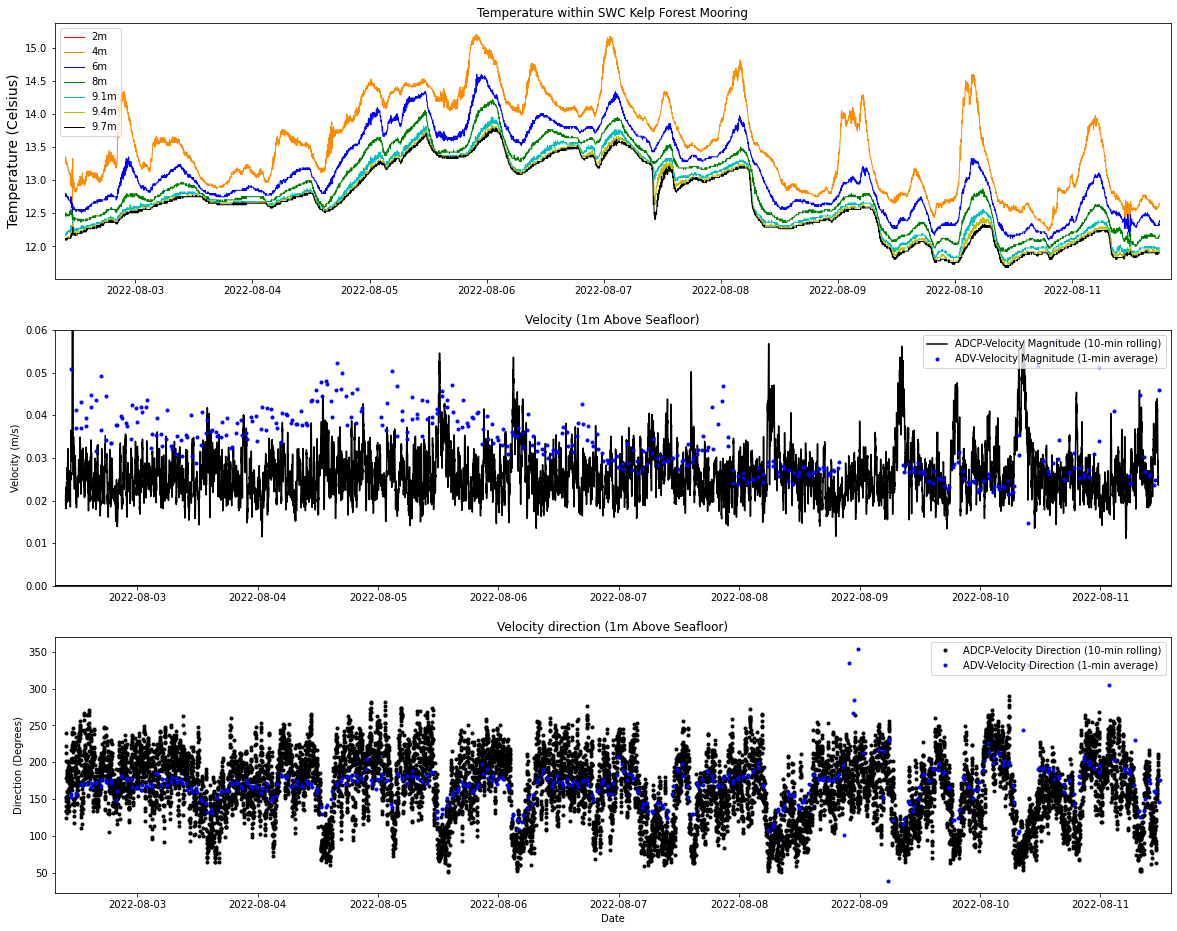

In [65]:
# TEMPERATURE
plt.figure(figsize = (20,16))

plt.subplot(311)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp_dep1.time, temp_dep1.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)
plt.margins(x=.01)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')
#=================================================================================================
# Eastern Velocity
plt.subplot(312)
#plt.plot(adcp_dep1.time, adcp_dep1.Magnitude.isel(BinDist=1), '.r', label = 'ADCP-Velocity magnitude')
plt.plot(adcp1_10mroll_dep1.time, adcp1_10mroll_dep1.Magnitude,'-k', label = 'ADCP-Velocity Magnitude (10-min rolling)')
plt.plot(adv_10m_dep1.time, adv_10m_dep1.CSPD, '.b', label = 'ADV-Velocity Magnitude (1-min average)')
plt.ylim(0,.06)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.title('Velocity (1m Above Seafloor)')
#=================================================================================================
# Northern Velocity
plt.subplot(313)
#plt.plot(adcp_dep1.time, adcp_dep1.Direction.isel(BinDist=1), '.r', label = 'ADCP-Eastern')
plt.plot(adcp1_10mroll_dep1.time, adcp1_10mroll_dep1.Direction,'.k', label = 'ADCP-Velocity Direction (10-min rolling)')
plt.plot(adv_10m_dep1.time, adv_10m_dep1.CDIR, '.b', label = 'ADV-Velocity Direction (1-min average)')
plt.legend(loc = 'upper right')
plt.margins(x=.01)
plt.ylabel('Direction (Degrees)')
plt.xlabel('Date')
plt.title('Velocity direction (1m Above Seafloor)')

## Cooling events
- Cooling event triggered by dramatic drop in temperature and simultaneous dramatic increase in northereastern velocity (0 < velocity < 90)
- Events appear to occur on diurnal to semidiiurnal basis
- Due to orientation of SWC and location of the site, NE velocity is associated with ONSHORE transport

### Zoom in on single event
- Large cooling event occurs from 8/8 - 8/9

In [99]:
# Further slice to focus on 8/8 - 8/9 cooling event

# Temperature
temp1_ce = temp.sel(time=slice('2022-08-08T00:00:00.000000000', '2022-08-08T12:00:00.000000000'))
temp1_ce = temp.sel(time=slice('2022-08-08T00:00:00.000000000', '2022-08-08T12:00:00.000000000'))

# ADCP
adcp1_ce = adcp1.sel(time=slice('2022-08-08T00:00:00.000000000', '2022-08-08T12:00:00.000000000'))
adcp1_10mroll_ce = adcp1_10mroll.sel(time=slice('2022-08-08T00:00:00.000000000', '2022-08-08T12:00:00.000000000'))
adcp1_east_10mroll_ce = adcp1_east_10mroll.sel(time=slice('2022-08-08T00:00:00.000000000', '2022-08-08T12:00:00.000000000'))

# ADV
adv_1m_ce = adv1_1m.sel(time=slice('2022-08-08T00:00:00.000000000', '2022-08-08T12:00:00.000000000'))

Text(0.5, 1.0, 'Eastern Velocity (1m Above Seafloor)')

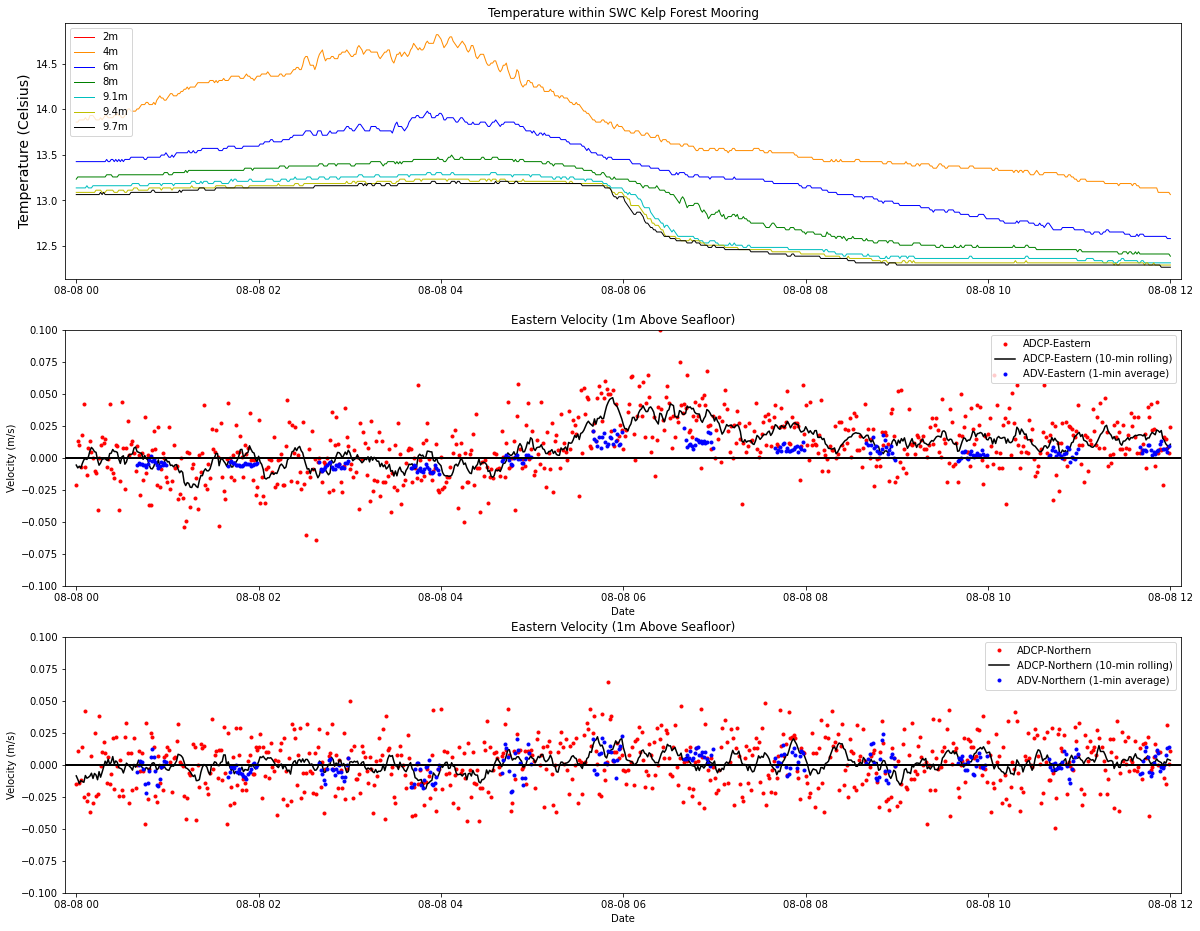

In [100]:
# TEMPERATURE
plt.figure(figsize = (20,16))

plt.subplot(311)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)
#plt.xlabel("Datetime", fontsize = 14)
plt.margins(x=.01)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')
#=================================================================================================
# Eastern
plt.subplot(312)
plt.plot(adcp1_ce.time, adcp1_ce.East.isel(BinDist=1), '.r', label = 'ADCP-Eastern')
plt.plot(adcp1_10mroll_ce.time, adcp1_10mroll_ce.East,'-k', label = 'ADCP-Eastern (10-min rolling)')
plt.plot(adv_1m_ce.time, adv_1m_ce.East, '.b', label = 'ADV-Eastern (1-min average)')
plt.ylim(-.1,.1)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.xlabel('Date')
plt.title('Eastern Velocity (1m Above Seafloor)')
#=================================================================================================
# Northern
plt.subplot(313)
plt.plot(adcp1_ce.time, adcp1_ce.North.isel(BinDist=1), '.r', label = 'ADCP-Northern')
plt.plot(adcp1_10mroll_ce.time, adcp1_10mroll_ce.North,'-k', label = 'ADCP-Northern (10-min rolling)')
plt.plot(adv_1m_ce.time, adv_1m_ce.North, '.b', label = 'ADV-Northern (1-min average)')
plt.ylim(-.1,.1)
plt.legend(loc = 'upper right')
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)
plt.ylabel('Velocity (m/s)')
plt.xlabel('Date')
plt.title('Eastern Velocity (1m Above Seafloor)')

<ipython-input-102-f44b5f52a67a>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(adcp1_ce.time, adcp1_ce.BinDist, adcp1_ce.East,norm=norm)


(array([19212.        , 19212.08333333, 19212.16666667, 19212.25      ,
        19212.33333333, 19212.41666667, 19212.5       ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

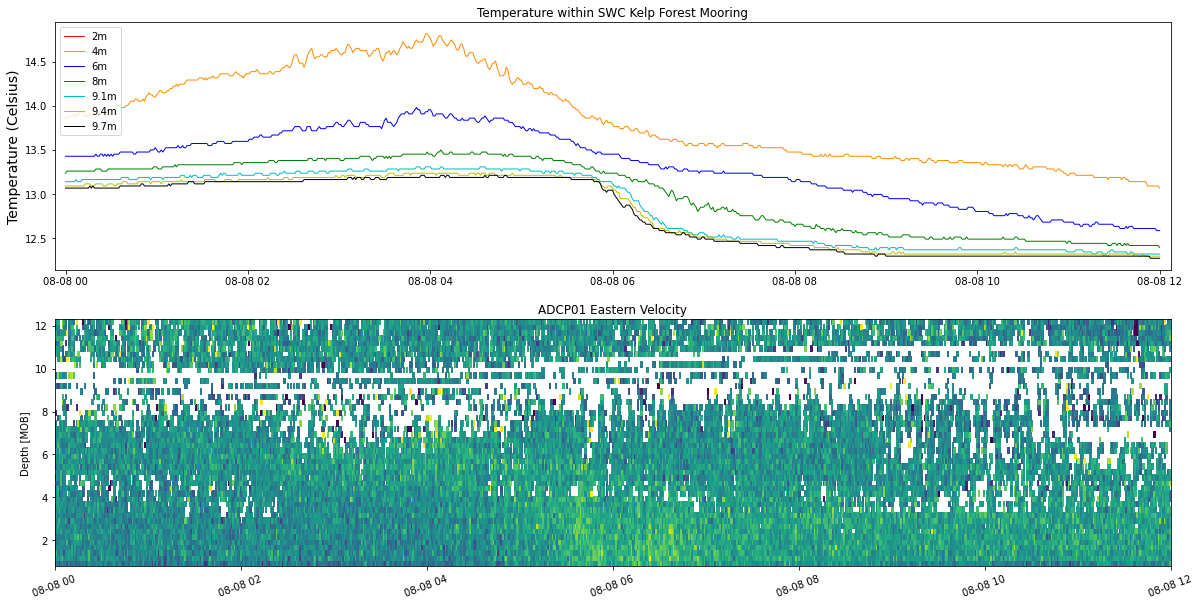

In [102]:
# TEMPERATURE
plt.figure(figsize = (20,10))

plt.subplot(211)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp1_ce.time, temp1_ce.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)
#plt.xlabel("Datetime", fontsize = 14)
plt.margins(x=.01)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'], loc = 'upper left')

plt.subplot(212)
minvel = -.1 # Limits for the colorbars used on the adcp colorplots
maxvel = .1
norm = matplotlib.colors.Normalize(vmin=minvel,vmax=maxvel)
plt.title('ADCP01 Eastern Velocity')
plt.pcolormesh(adcp1_ce.time, adcp1_ce.BinDist, adcp1_ce.East,norm=norm)
#plt.colorbar(label='Eastern velocity [m/s]')
plt.ylabel('Depth [MOB]')
plt.margins(x=.01)
plt.xticks(rotation='20')


In [220]:
tmean = temp.mean() # 12.29
kv = .000001225 # kv found on https://www.omnicalculator.com/physics/water-viscosity
Re = 1000 # Re number where turbulence is observed
Vmean = adv.Magnitude.mean() # .0343 m/s

# Re = Vmean * diameter / kv, diameter = Re * kv/ Vmean
diam = ((Re * kv)/Vmean)

In [343]:
# Above data coincides with weeks 2 and 3
# survey_dates[1:3]
kelp_diam_w1_3 = kelp_diam_w2_3.append(kelp_diam_w1)

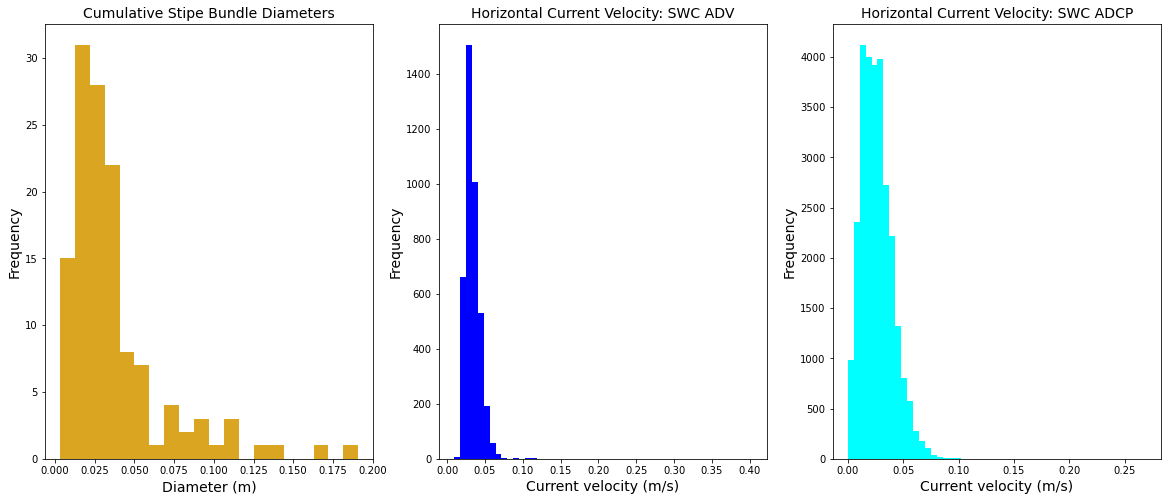

In [419]:
#survey_dates[0:3]
#kelp_diam_w1_3.stack()
plt.figure(figsize = (20,8))

plt.subplot(131)
plt.hist(kelp_diam_w1_3.stack()/100, bins =20, color = 'goldenrod')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Diameter (m)', fontsize = 14)
plt.title('Cumulative Stipe Bundle Diameters', fontsize = 14)

plt.subplot(132)
plt.hist(adv01_1min.Magnitude, bins=50, color = 'blue')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADV', fontsize = 14)

plt.subplot(133)
plt.hist(adcp01.Magnitude.isel(BinDist = 1), bins=50, color = 'cyan')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADCP', fontsize = 14)

plt.savefig('Plots/Dep1_kelp_current_histograms')

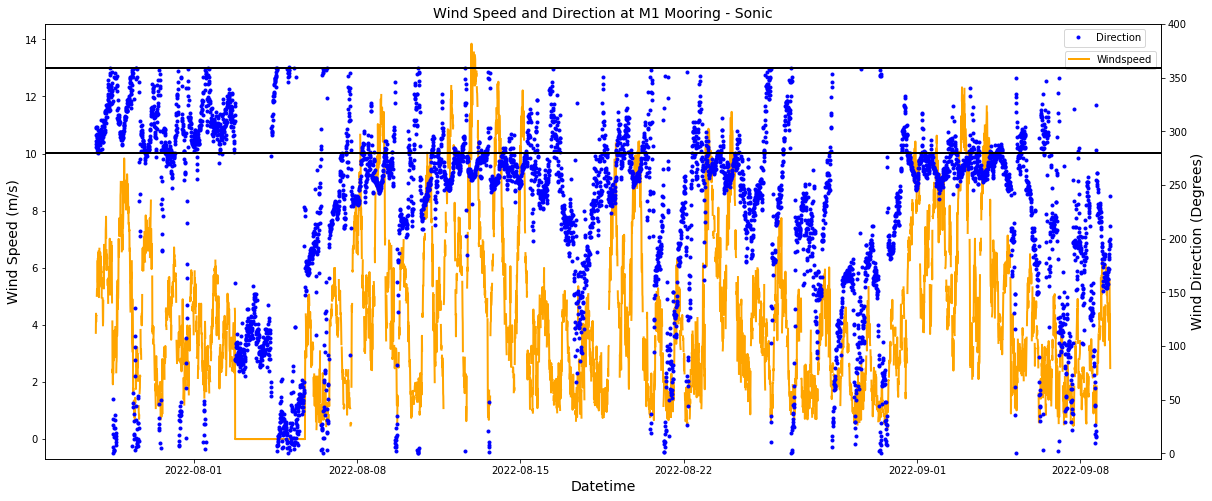

In [59]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (20, 8))

# make a plot

lns1 = ax.plot(m1_wind.time, m1_wind.wind_speed_sonic, 'orange', lw = 2, label='Windspeed')
# set x-axis label
ax.set_xlabel("Datetime", fontsize = 14)
# set y-axis label
ax.set_ylabel("Wind Speed (m/s)", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
lns2 = ax2.plot(m1_wind.time, m1_wind.wind_from_direction_sonic, '.b', lw = 2, label='Direction')
ax2.set_ylim(-5,400)
ax2.set_ylabel("Wind Direction (Degrees)",fontsize=14)


# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(loc=1, bbox_to_anchor=(1,.95)) #(leg, labs, loc=0)
plt.axhline(y=359, c='black', lw=2)
plt.axhline(y=280, c='black', lw=2)
plt.title('Wind Speed and Direction at M1 Mooring - Sonic', fontsize=14)
plt.legend(bbox_to_anchor=(.99,1))

plt.margins(x=.01, y = .5)
#plt.show()
#plt.savefig('Plots/m1_windspeed_+_direction.PNG')

In [ ]:
# Import kelp survey data
kelp = pd.read_csv('Kelp/kelp_data_noLR.csv')

kelp_diam_w1 = kelp_diam.iloc[0:8,:]
w1_mean = kelp_diam_w1.stack().mean()
w1_max = kelp_diam_w1.stack().max()
w1_min = kelp_diam_w1.stack().min()

kelp_diam_w2 = kelp_diam.iloc[8:18,:]
w2_mean = kelp_diam_w2.stack().mean()
w2_max = kelp_diam_w2.stack().max()
w2_min = kelp_diam_w2.stack().min()

kelp_diam_w3 = kelp_diam.iloc[18:33,:]
w3_mean = kelp_diam_w3.stack().mean()
w3_max = kelp_diam_w3.stack().max()
w3_min = kelp_diam_w3.stack().min()

kelp_diam_w4 = kelp_diam.iloc[33:48,:]
w4_mean = kelp_diam_w4.stack().mean()
w4_max = kelp_diam_w4.stack().max()
w4_min = kelp_diam_w4.stack().min()

kelp_diam_w5 = kelp_diam.iloc[48:,:]
w5_mean = kelp_diam_w5.stack().mean()
w5_max = kelp_diam_w5.stack().max()
w5_min = kelp_diam_w5.stack().min()

density_w1 = kelp_diam_w1.count().sum() / 286.28
density_w2 = kelp_diam_w2.count().sum() / 286.28
density_w3 = kelp_diam_w3.count().sum() / 286.28
density_w4 = kelp_diam_w4.count().sum() / 286.28
density_w5 = kelp_diam_w5.count().sum() / 286.28
density_arr = [density_w1, density_w2, density_w3, density_w4, density_w5]

kelp_mean_arr = np.array([w1_mean, w2_mean, w3_mean, w4_mean, w5_mean])
kelp_max_arr = np.array([w1_max, w2_max, w3_max, w4_max, w5_max])
kelp_min_arr = np.array([w1_min, w2_min, w3_min, w4_min, w5_min])

kelp['Date'] = pd.to_datetime(kelp['Date'])
survey_dates = np.unique(kelp['Date'])

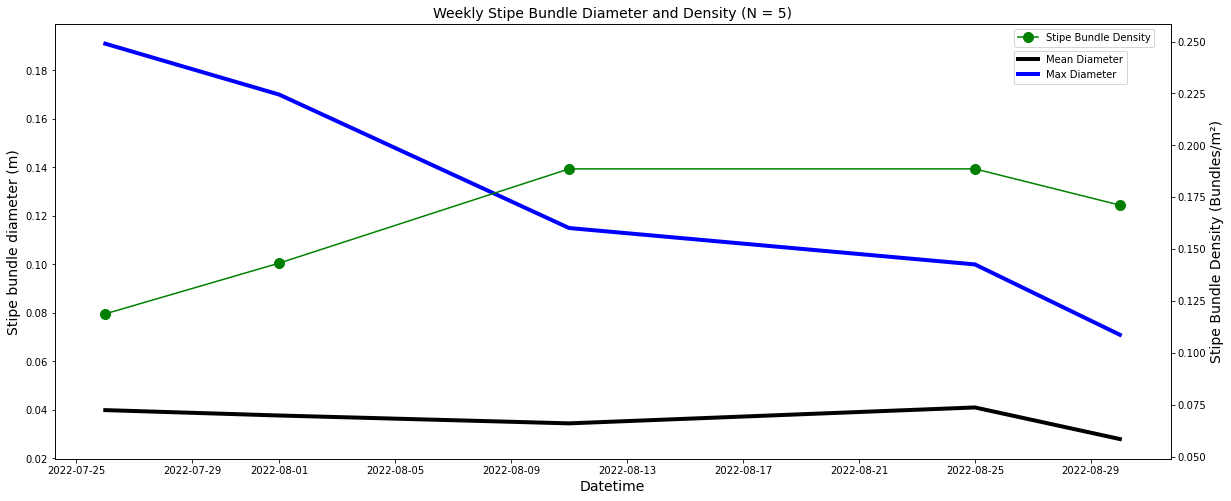

In [492]:
fig,ax = plt.subplots(figsize = (20, 8))

ax.plot(survey_dates, kelp_mean_arr/100, '-k', lw = 4, label= 'Mean Diameter')
ax.plot(survey_dates, kelp_max_arr/100, '-b', lw = 4, label = 'Max Diameter')

ax2=ax.twinx()
ax2.plot(survey_dates, density_arr, '-g', marker = 'o', ms = 10, label = 'Stipe Bundle Density')

ax.legend(loc=1, bbox_to_anchor=(.965,.95))
ax2.legend(bbox_to_anchor=(.99,1))
ax.set_ylabel('Stipe bundle diameter (m)', fontsize = 14)
ax2.set_ylabel('Stipe Bundle Density (Bundles/m\u00b2)', fontsize = 14)
ax.set_xlabel('Datetime', fontsize = 14)
plt.title('Weekly Stipe Bundle Diameter and Density (N = 5)', fontsize = 14)
plt.margins(x=.01, y = 1)



plt.savefig('Plots/kelp_timeseries')